In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def gerar_graficos_cdf(passo_xticks=5, label='CDF', valores_label=['0', '45', '90']):
    # Definir a pasta de destino
    directory = os.getcwd()
    pasta_destino = os.path.join(directory, 'RAS')
    
    # Obter todos os arquivos .csv que contêm a label no nome
    all_files = [f for f in os.listdir(pasta_destino) if f.endswith('.csv') and label in f]
    
    # Obter a lista de nomes base de arquivos sem a label
    base_names = set(f.split('_km_')[1] for f in all_files)
    
    # Inicializar valores globais para min e max
    global_min = float('inf')
    global_max = float('-inf')

    # Primeiro, calcular o min e max globais
    for base_name in base_names:
        for valor_label in valores_label:
            file_name = f"RAS_{valor_label}_km_{base_name}"
            file_path = os.path.join(pasta_destino, file_name)
            if os.path.exists(file_path):
                try:
                    # Ler o arquivo .csv utilizando pandas
                    data = pd.read_csv(file_path)
                    
                    # Remover linhas que não contêm valores numéricos válidos
                    data = data.apply(pd.to_numeric, errors='coerce').dropna()
                    
                    if not data.empty:
                        global_min = min(global_min, data.iloc[:, 0].min())
                        global_max = max(global_max, data.iloc[:, 0].max())
                except Exception as e:
                    print(f"Erro ao processar o arquivo {file_name}: {e}")

    # Em seguida, plotar os gráficos ajustando os eixos
    for base_name in base_names:
        plt.figure()
        for valor_label in valores_label:
            file_name = f"RAS_{valor_label}_km_{base_name}"
            file_path = os.path.join(pasta_destino, file_name)
            if os.path.exists(file_path):
                try:
                    # Ler o arquivo .csv utilizando pandas
                    data = pd.read_csv(file_path)
                    
                    # Remover linhas que não contêm valores numéricos válidos
                    data = data.apply(pd.to_numeric, errors='coerce').dropna()
                    
                    # Verificar se há dados suficientes para plotar
                    if data.empty or data.shape[0] < 2:
                        print(f"Arquivo {file_name} não tem dados suficientes para plotar.")
                        continue
                    
                    # Plotar a CDF
                    plt.plot(data.iloc[:, 0], data.iloc[:, 1], label=f'RAS {valor_label} KM')
                except Exception as e:
                    print(f"Erro ao processar o arquivo {file_name}: {e}")
        
        # Configurações do gráfico
        plt.xlabel('Value')
        plt.ylabel('CDF')
        plt.title(f'CDF Plot for {base_name}')
        plt.legend()
        plt.grid(True)

        # Definir os yticks
        plt.yticks([0, 0.25, 0.5, 0.75, 1])

        # Definir os xticks como inteiros do menor ao maior valor, com o passo fornecido
        plt.xticks(range(int(global_min), int(global_max) + 1, passo_xticks))
        
        plt.show()

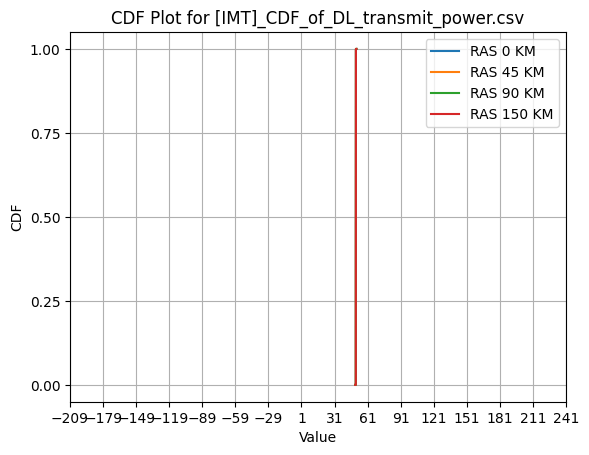

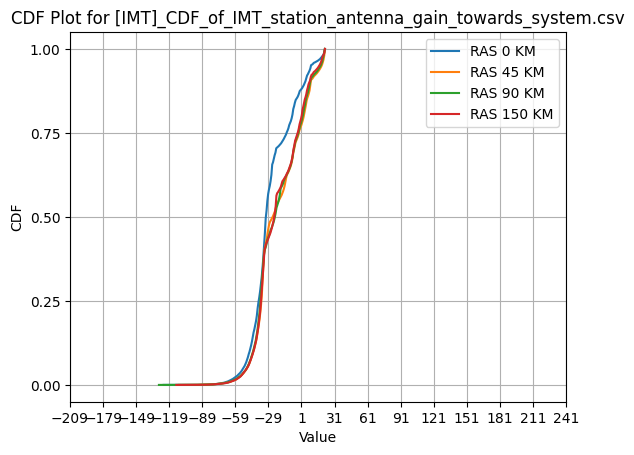

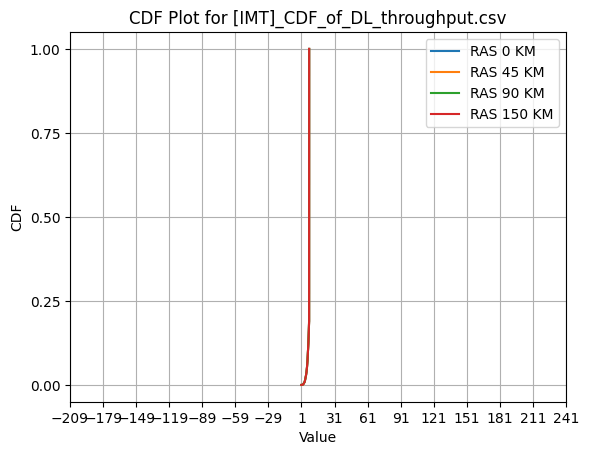

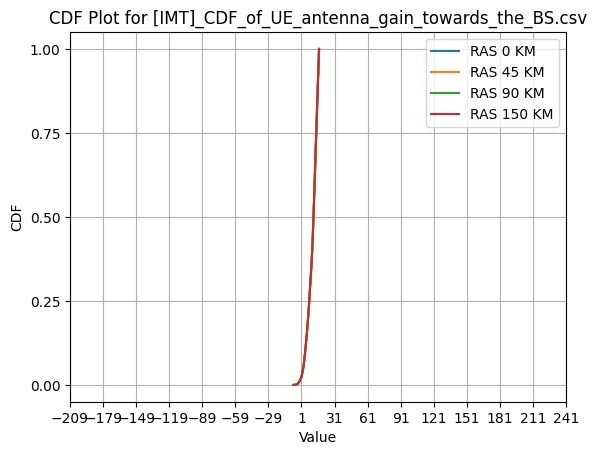

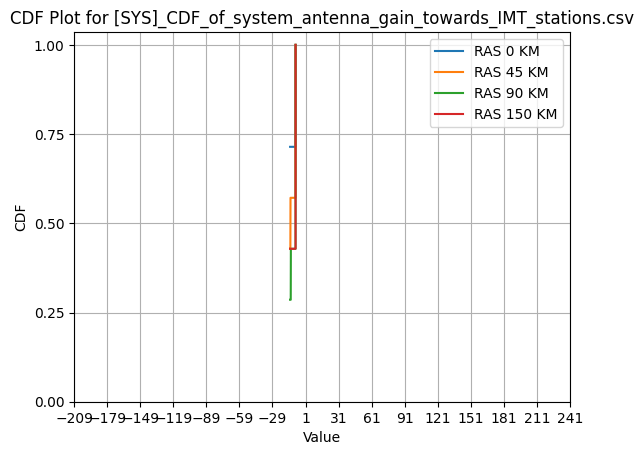

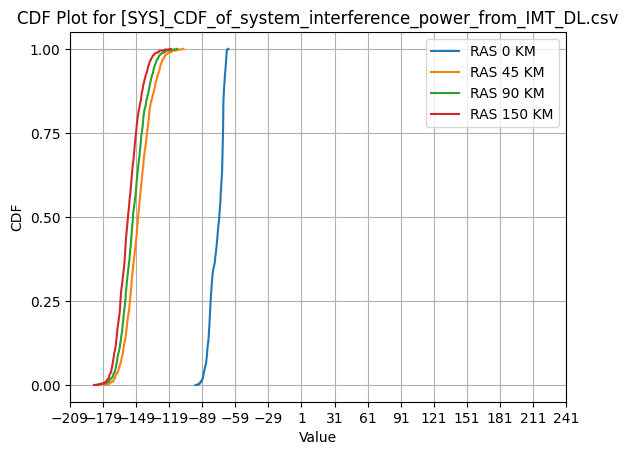

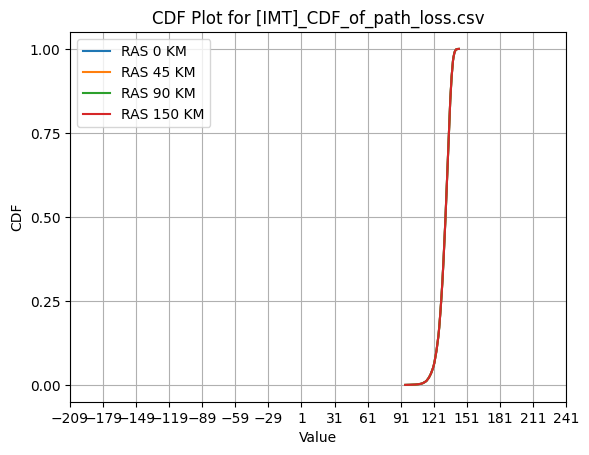

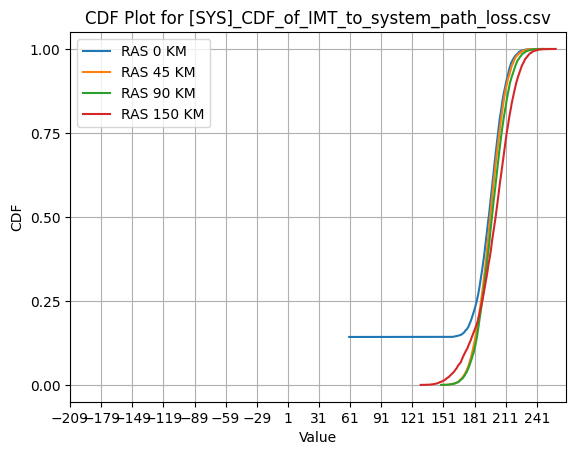

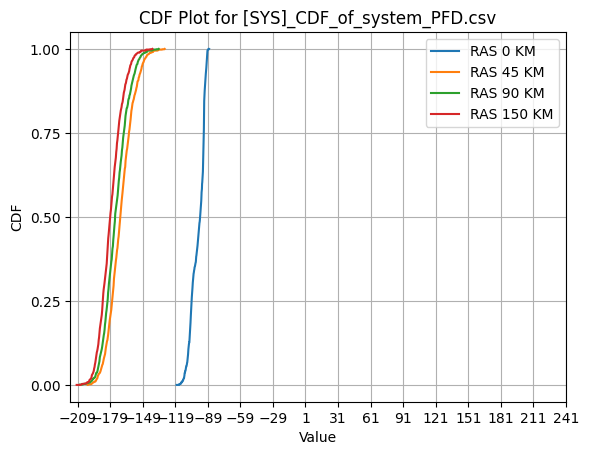

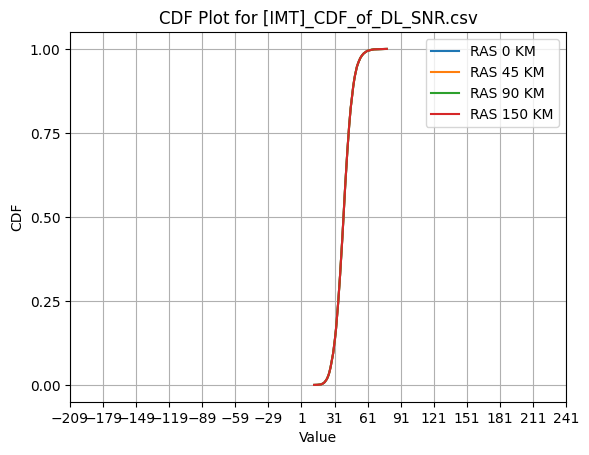

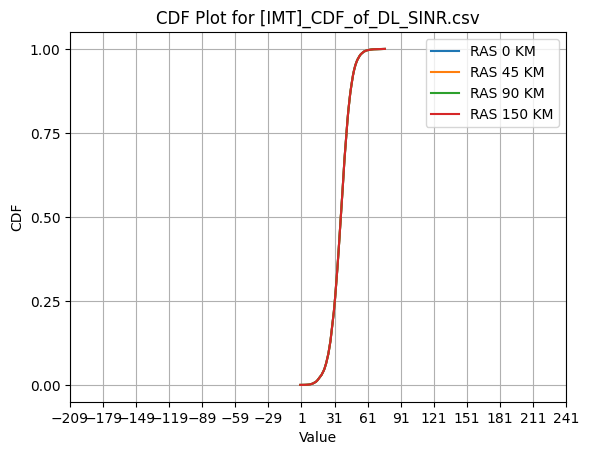

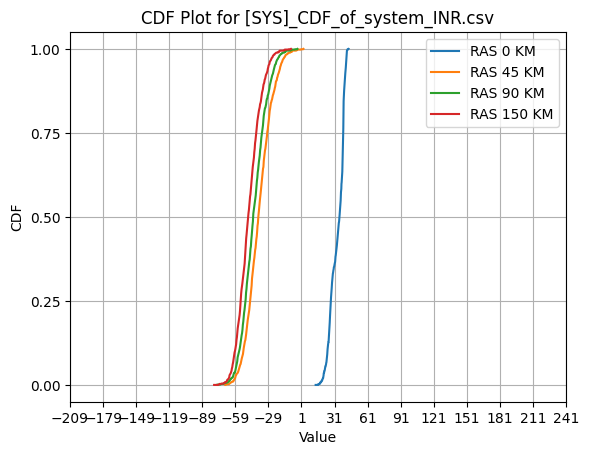

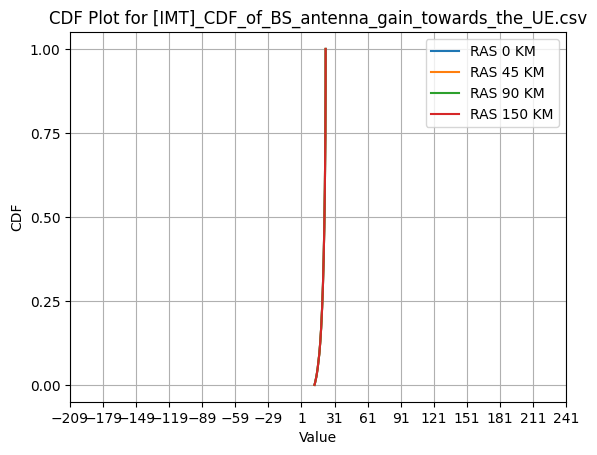

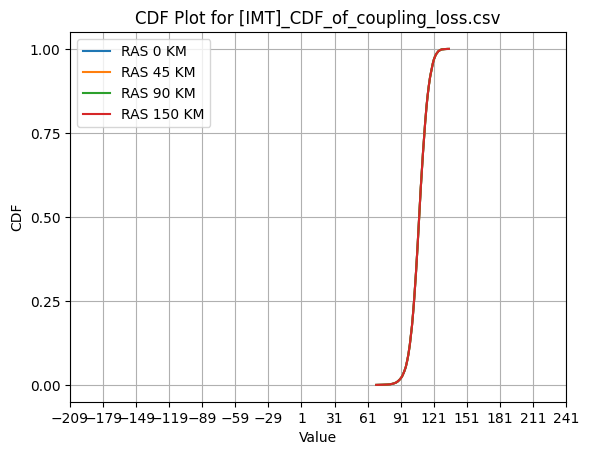

In [14]:
gerar_graficos_cdf(passo_xticks=30, label='CDF', valores_label=['0', '45', '90','150'])